# Classification 

In [43]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import PrecisionRecallCurve

#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

%matplotlib inline

In [44]:
df = pd.read_csv('/Users/sudeshgurung/Msc-Data_Analytics/ADTA_with_python/Course_work_1/Census.csv')
df.dtypes

Person ID                      int64
Region                        object
Residence Type                object
Family Composition             int64
Population Base                int64
Sex                            int64
Age                            int64
Marital Status                 int64
Student                        int64
Country of Birth               int64
Health                         int64
Ethnic Group                   int64
Religion                       int64
Economic Activity              int64
Occupation                     int64
Industry                       int64
Hours worked per week          int64
No of hours                  float64
Approximated Social Grade      int64
dtype: object

## Pre-Processing data

In [45]:
df = df.drop(columns=['Person ID'])
del df['No of hours']
df

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,-9
2,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,2
3,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,4
4,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,E12000008,C,-9,1,1,2,1,2,2,1,1,2,1,3,9,4,-9
569736,E12000008,C,-9,1,1,3,1,2,2,2,2,1,1,1,5,4,-9
569737,E12000008,C,-9,1,2,5,2,2,1,1,1,2,2,1,8,4,-9
569738,W92000004,H,2,1,1,6,2,2,1,3,1,1,1,6,10,4,3


### Mapping actual values

In [46]:
#mapping 
family_comp = {
    1 : "Not in a family", 
    2: "Married/same-sex civil partnership couple family", 
    3: "Cohabiting couple family",
    4: "Lone parent family (male head)",
    5: "Lone parent family (female head)", 
    6: "Other related family", 
    -9: "No code required"
}
population_base = {
    1: "Usual resident",
    2: "Student living away from home during term-time",
    3: "Short-term resident"
}
sex = {
    1: "Male",
    2: "Female"
}
age = {
    1: "0to15",
    2: "16to24",
    3: "25to34",
    4:"35to44",
    5: "45to54",
    6: "55to64",
    7: "65to74",
    8: "75 and over"
}
marital_status = {
    1: "Single (never married or never registered a same-sex civil partnership)",
    2: "Married or in a registered same-sex civil partnership",
    3: "Separated but still legally married or separated but still legally in a same-sex civil partnership",
    4: "Divorced or formerly in a same-sex civil partnership which is now legally dissolved",
    5: "Widowed or surviving partner from a same-sex civil partnership",
}
student = {
    1:" Yes",
    2: "No"
}
country_of_birth = {
    1: "UK",
    2: "Non UK",
    -9: "No code required"
}
health = {
    1: "Very good health",
    2: "Good health",
    3: "Fair health",
    4: "Bad health",
    5: "Very bad health",
    -9: "No code required"
}
ethnic_group = {
    1: "White", 
    2: "Mixed", 
    3: "Asian and Asian British", 
    4: "Black or Black British", 
    5: "Chinese or Other ethnic group",
    -9: "No code required"
}
religion = {
    1: "No religion",
    2: "Christian",
    3: "Buddhist",
    4: "Hindu",
    5: "Jewish",
    6: "Muslim",
    7: "Sikh",
    8: "Other religion",
    9: "Not stated",
    -9:" No code required "
}
economic_activity = {
    1: "Economically active: Employee",
    2: "Economically active: Self-employed",
    3: "Economically active: Unemployed",
    4: "Economically active: Full-time student",
    5: "Economically inactive: Retired",
    6: "Economically inactive: Student",
    7:" Economically inactive: Looking after home or family",
    8: "Economically inactive: Long-term sick or disabled",
    9: "Economically inactive: Other",
    -9: "No code required",
}
occupation = {
    1: "Managers, Directors and Senior Officials",
    2: "Professional Occupations",
    3:" Associate Professional and Technical Occupations",
    4: "Administrative and Secretarial Occupations",
    5: "Skilled Trades Occupations",
    6:" Caring, Leisure and Other Service Occupations",
    7: "Sales and Customer Service Occupations",
    8: "Process, Plant and Machine Operatives",
    9: "Elementary Occupations",
    -9: "No code required ",
    }
industry = {
    1: "Agriculture, forestry and fishing",
    2: "Mining and quarrying; Manufacturing;Electricity, gas, steam and air conditioning system; Water supply",
    3: "Construction",
    4: "Wholesale and retail trade; Repair of motor vehicles and motorcycles",
    5: "Accommodation and food service activities",
    6: "Transport and storage; Information and communication",
    7: "Financial and insurance activities; Intermediation",
    8: "Real estate activities; Professional, scientific and technical activities; Administrative and support service activities",
    9: "Public administration and defence; compulsory social security",
    10: "Education",
    11: "Human health and social work activities",
    12: "Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies",
    -9: "No code required "
}
hours_worked_per_week = {
    1: "Part-time: 15 or less hours worked",
    2:"Part-time: 16 to 30 hours worked",
    3: "Full-time: 31 to 48 hours worked",
    4: "Full-time: 49 or more hours worked",
    -9: "No code required",
}
approx_sc_grade = {
    1: "AB",
    2: "C1",
    3: "C2",
    4: "DE",
    -9: "No code required"
}

In [47]:
df['Family Composition'].replace(family_comp, inplace = True)
df['Population Base'].replace(population_base, inplace = True)
df['Sex'].replace(sex, inplace = True)
df['Age'].replace(age, inplace = True)
df['Marital Status'].replace(marital_status, inplace = True)
df['Student'].replace(student, inplace = True)
df['Country of Birth'].replace(country_of_birth, inplace = True)
df['Health'].replace(health, inplace = True)
df['Ethnic Group'].replace(ethnic_group, inplace = True)
df['Religion'].replace(religion, inplace = True)
df['Economic Activity'].replace(economic_activity, inplace = True)
df['Occupation'].replace(occupation, inplace = True)
df['Industry'].replace(industry, inplace = True)
df['Hours worked per week'].replace(hours_worked_per_week, inplace = True)
df['Approximated Social Grade'].replace(approx_sc_grade, inplace = True)

df

,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,E12000001,H,Married/same-sex civil partnership couple family,Usual resident,Female,55to64,Married or in a registered same-sex civil part...,No,UK,Good health,White,Christian,Economically inactive: Retired,"Process, Plant and Machine Operatives",Mining and quarrying; Manufacturing;Electricit...,No code required,DE
1,E12000001,H,Cohabiting couple family,Usual resident,Female,0to15,Single (never married or never registered a sa...,No,UK,Good health,White,No religion,No code required,No code required,No code required,No code required,No code required
2,E12000001,H,Married/same-sex civil partnership couple family,Usual resident,Male,65to74,Married or in a registered same-sex civil part...,No,UK,Very good health,White,Christian,Economically inactive: Retired,"Process, Plant and Machine Operatives",Mining and quarrying; Manufacturing;Electricit...,No code required,C1
3,E12000001,H,Not in a family,Usual resident,Female,55to64,Divorced or formerly in a same-sex civil partn...,No,UK,Fair health,White,Christian,Economically inactive: Retired,Elementary Occupations,Accommodation and food service activities,No code required,DE
4,E12000001,H,Married/same-sex civil partnership couple family,Usual resident,Male,0to15,Single (never married or never registered a sa...,Yes,UK,Very good health,White,No religion,No code required,No code required,No code required,No code required,No code required
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569735,E12000008,C,No code required,Usual resident,Male,16to24,Single (never married or never registered a sa...,No,Non UK,Very good health,White,Christian,Economically active: Employee,Associate Professional and Technical Occupations,Public administration and defence; compulsory ...,Full-time: 49 or more hours worked,No code required
569736,E12000008,C,No code required,Usual resident,Male,25to34,Single (never married or never registered a sa...,No,Non UK,Good health,Mixed,No religion,Economically active: Employee,"Managers, Directors and Senior Officials",Accommodation and food service activities,Full-time: 49 or more hours worked,No code required
569737,E12000008,C,No code required,Usual resident,Female,45to54,Married or in a registered same-sex civil part...,No,UK,Very good health,White,Christian,Economically active: Self-employed,"Managers, Directors and Senior Officials","Real estate activities; Professional, scientif...",Full-time: 49 or more hours worked,No code required
569738,W92000004,H,Married/same-sex civil partnership couple family,Usual resident,Male,55to64,Married or in a registered same-sex civil part...,No,UK,Fair health,White,No religion,Economically active: Employee,"Caring, Leisure and Other Service Occupations",Education,Full-time: 49 or more hours worked,C2


In [48]:
df = df.sample(frac=0.1, random_state = 1)

In [49]:
X = df.drop(columns=['Approximated Social Grade'])
y = df['Approximated Social Grade']

In [50]:
y[:15]

257725                  AB
298417    No code required
440058                  AB
352710                  AB
150562                  C1
296165    No code required
543642                  AB
9483      No code required
277643                  C2
135961                  C2
68118                   AB
296502    No code required
458651                  C2
380401                  C1
275595                  DE
Name: Approximated Social Grade, dtype: object

In [51]:
#encoding 
oe = OrdinalEncoder()
X['Age'] = oe.fit_transform(X[['Age']])
X['Hours worked per week'] = oe.fit_transform(X[['Hours worked per week']])
X

#dummy encoding the rest 
X = pd.get_dummies(X)
X

,Age,Hours worked per week,Region_E12000001,Region_E12000002,Region_E12000003,Region_E12000004,Region_E12000005,Region_E12000006,Region_E12000007,Region_E12000008,...,Industry_Education,Industry_Financial and insurance activities; Intermediation,Industry_Human health and social work activities,"Industry_Mining and quarrying; Manufacturing;Electricity, gas, steam and air conditioning system; Water supply",Industry_No code required,"Industry_Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies",Industry_Public administration and defence; compulsory social security,"Industry_Real estate activities; Professional, scientific and technical activities; Administrative and support service activities",Industry_Transport and storage; Information and communication,Industry_Wholesale and retail trade; Repair of motor vehicles and motorcycles
257725,3.0,2.0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
298417,0.0,2.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
440058,2.0,0.0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
352710,2.0,4.0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
150562,5.0,2.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451878,4.0,0.0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
508262,2.0,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
152857,6.0,2.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
353531,4.0,4.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
#encoding y (for mean squared errors)
le = LabelEncoder()
enc_y = le.fit_transform(y)
pd.unique(enc_y)

array([0, 4, 1, 2, 3])

In [53]:
enc_y[:15]

array([0, 4, 0, 0, 1, 4, 0, 4, 2, 2, 0, 4, 2, 1, 3])

In [54]:
#scaling the X
min_max_scaler = MinMaxScaler()
scaled_x = min_max_scaler.fit_transform(X)
print(scaled_x)
scaled_x_df = pd.DataFrame(data = scaled_x, index=X.index, columns= X.columns)
scaled_x_df

[[0.42857143 0.5        0.         ... 0.         0.         0.        ]
 [0.         0.5        0.         ... 0.         0.         0.        ]
 [0.28571429 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.85714286 0.5        0.         ... 0.         0.         0.        ]
 [0.57142857 1.         0.         ... 0.         1.         0.        ]
 [0.42857143 0.         1.         ... 1.         0.         0.        ]]


,Age,Hours worked per week,Region_E12000001,Region_E12000002,Region_E12000003,Region_E12000004,Region_E12000005,Region_E12000006,Region_E12000007,Region_E12000008,...,Industry_Education,Industry_Financial and insurance activities; Intermediation,Industry_Human health and social work activities,"Industry_Mining and quarrying; Manufacturing;Electricity, gas, steam and air conditioning system; Water supply",Industry_No code required,"Industry_Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies",Industry_Public administration and defence; compulsory social security,"Industry_Real estate activities; Professional, scientific and technical activities; Administrative and support service activities",Industry_Transport and storage; Information and communication,Industry_Wholesale and retail trade; Repair of motor vehicles and motorcycles
257725,0.428571,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298417,0.000000,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
440058,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
352710,0.285714,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150562,0.714286,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451878,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
508262,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
152857,0.857143,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353531,0.571429,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x_df, enc_y, test_size=0.3, random_state=1)

In [56]:
# confusion matrix 
def create_cm(y_test, y_pred): 
    true_grade = le.inverse_transform(y_test)
    predicted_grade = le.inverse_transform(y_pred)

    unique_label = np.unique([true_grade, predicted_grade])
    return confusion_matrix(true_grade, predicted_grade, labels=unique_label ), unique_label

In [57]:
#decoding
def show_true_values(y_test, y_pred):
    true_grade = le.inverse_transform(y_test)
    predicted_grade = le.inverse_transform(y_pred)
    return true_grade, predicted_grade


## 1. KNN Algorithm

In [58]:
knn = KNeighborsClassifier(n_neighbors=7)

In [59]:
#fit the clasifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [60]:
#predicted values using the knn model
y_pred=knn.predict(X_test)

In [61]:
#performance metrics

#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("AUC:", roc_auc_score(y_test, y_pred))

cm, uniq_lbls = create_cm(y_test, y_pred)
pd.DataFrame(cm, index = uniq_lbls, columns=uniq_lbls)


[[1872  483   50  113    2]
 [ 581 3671  152  381   10]
 [ 118  178 1529  579    7]
 [ 141  302  498 2721   11]
 [   6   12    5    7 3664]] 

Mean Absolute Error: 0.29690516585736854
Mean Squared Error: 0.5003802726262213
Root Mean Squared Error: 0.7073756234322902 

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      2520
           1       0.79      0.77      0.78      4795
           2       0.68      0.63      0.66      2411
           3       0.72      0.74      0.73      3673
           4       0.99      0.99      0.99      3694

    accuracy                           0.79     17093
   macro avg       0.77      0.78      0.77     17093
weighted avg       0.79      0.79      0.79     17093

Accuracy: 0.7872813432399228


,AB,C1,C2,DE,No code required
AB,1872,483,50,113,2
C1,581,3671,152,381,10
C2,118,178,1529,579,7
DE,141,302,498,2721,11
No code required,6,12,5,7,3664


In [62]:
#X_train, X_test, y_train, y_test = train_test_split(enc_x_df, enc_y, test_size=0.3, random_state=0)

### Finding the optimal value of K

In [63]:
# try k=1 through k=15 and record accuracy
k_range = range(1, 61)

# create a Python dictionary using [] or dict()
scores = {}

# loop through the k values; append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    #scores.append(metrics.accuracy_score(y_test, y_pred))
    score = metrics.accuracy_score(y_test, y_pred)
    scores[k] = score
print(scores)

{1: 0.7379629087930731, 2: 0.7213479202012519, 3: 0.7572105540279647, 4: 0.7686772362955596, 5: 0.7784473176153981, 6: 0.7830105891300533, 7: 0.7872813432399228, 8: 0.7894459720353361, 9: 0.7935997191832914, 10: 0.7945942783595624, 11: 0.7953548236120049, 12: 0.7982214941789036, 13: 0.797870473293161, 14: 0.7979289767741181, 15: 0.7989820394313462, 16: 0.8016146960744164, 17: 0.801439185631545, 18: 0.8027847656935587, 19: 0.800912654302931, 20: 0.8025507517697303, 21: 0.8007371438600597, 22: 0.8014976891125022, 23: 0.8005031299362312, 24: 0.8012636751886737, 25: 0.8010296612648452, 26: 0.8001521090504885, 27: 0.8013221786696308, 28: 0.8025507517697303, 29: 0.8028432691745159, 30: 0.8025507517697303, 31: 0.8015561925934593, 32: 0.8007956473410168, 33: 0.8020827239220734, 34: 0.8025507517697303, 35: 0.802901772655473, 36: 0.8020242204411162, 37: 0.8018487099982449, 38: 0.8021997308839875, 39: 0.8027262622126017, 40: 0.8036038144269584, 41: 0.8033698005031299, 42: 0.802375241326859, 43: 0

In [69]:
max(scores, key = scores.get)

40

In [70]:
# plot the relationship between k values and accuracy
# plt.plot(x_axis, y_axis)
#plt.plot(k_range, scores)


# plt.plot(range(len(scores)))
# plt.xlabel('Value of k for kNN')
# plt.ylabel('Accuracy')

In [71]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [72]:
from yellowbrick.classifier import ClassificationReport 

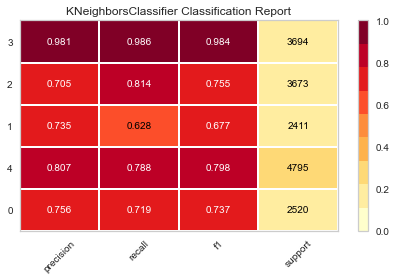

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [73]:
# Instantiate the classification model and visualizer
model = KNeighborsClassifier(n_neighbors=40)
classes = pd.unique(enc_y)
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

###  KNN with 40 neighours

In [75]:
knn = KNeighborsClassifier(n_neighbors=40)

In [76]:
#fit the clasifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [77]:
#predicted values using the knn model
y_pred=knn.predict(X_test)

In [78]:
#performance metrics

#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

#print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("AUC:", roc_auc_score(y_test, y_pred))
cm, uniq_lbls = create_cm(y_test, y_pred)
print("\n\t\tConfusion Matrix")
display(pd.DataFrame(cm, index = uniq_lbls, columns=uniq_lbls))


true_grade = le.inverse_transform(y_test)
predicted_grade = le.inverse_transform(y_pred)

report = classification_report(true_grade, predicted_grade, output_dict = True)
report_df_knn = pd.DataFrame(report).transpose()
print("\n\t\tAccuracy Statistics")
report_df_knn

Mean Absolute Error: 0.2739718013221787
Mean Squared Error: 0.4655121979757796
Root Mean Squared Error: 0.6822845432631313 

Accuracy: 0.8036038144269584

		Confusion Matrix


,AB,C1,C2,DE,No code required
AB,1811,528,33,140,8
C1,431,3778,131,431,24
C2,65,153,1514,666,13
DE,82,200,375,2990,26
No code required,7,20,7,17,3643



		Accuracy Statistics


,precision,recall,f1-score,support
AB,0.755843,0.718651,0.736778,2520.000000
C1,0.807437,0.787904,0.797551,4795.000000
C2,0.734951,0.627955,0.677253,2411.000000
DE,0.704524,0.814048,0.755337,3673.000000
No code required,0.980883,0.986194,0.983531,3694.000000
accuracy,0.803604,0.803604,0.803604,0.803604
macro avg,0.796728,0.786950,0.790090,17093.000000
weighted avg,0.804976,0.803604,0.802745,17093.000000


#### Cross Validation

In [79]:
#kNN cross-validation

knn = KNeighborsClassifier(n_neighbors=40)

#accuracy scores for each fold
scores = cross_val_score(knn, scaled_x_df, enc_y, cv=10)
print(scores)

#print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.8009828  0.81484731 0.8039663  0.8009828  0.80428296 0.79673512
 0.79761278 0.80709145 0.80761804 0.79673512]
Accuracy: 0.80 (+/- 0.01)


In [80]:
#performance metrics

#predicted values
y_pred = cross_val_predict(knn, scaled_x_df, enc_y, cv=10)

print(confusion_matrix(enc_y, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(enc_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(enc_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(enc_y, y_pred)), '\n')

print(classification_report(enc_y, y_pred))
print("Accuracy:", accuracy_score(enc_y, y_pred))
#print("AUC:", roc_auc_score(y, y_pred))
cm, uniq_lbls = create_cm(enc_y, y_pred)
pd.DataFrame(cm, index = uniq_lbls, columns=uniq_lbls)

[[ 5968  1739   143   476    23]
 [ 1509 12514   432  1415    96]
 [  216   519  5134  2091    34]
 [  230   651  1421  9991    69]
 [   28    56    19    52 12148]] 

Mean Absolute Error: 0.27321234247200477
Mean Squared Error: 0.46129813599185593
Root Mean Squared Error: 0.6791893226427046 

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      8349
           1       0.81      0.78      0.80     15966
           2       0.72      0.64      0.68      7994
           3       0.71      0.81      0.76     12362
           4       0.98      0.99      0.98     12303

    accuracy                           0.80     56974
   macro avg       0.79      0.79      0.79     56974
weighted avg       0.80      0.80      0.80     56974

Accuracy: 0.8030856180011935


,AB,C1,C2,DE,No code required
AB,5968,1739,143,476,23
C1,1509,12514,432,1415,96
C2,216,519,5134,2091,34
DE,230,651,1421,9991,69
No code required,28,56,19,52,12148


## 2. Random Forest

In [90]:
rf = RandomForestClassifier(n_estimators = 10, criterion= 'entropy', random_state=1)

In [91]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [92]:
y_pred = rf.predict(X_test)

In [93]:
#performance metrics

#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

#print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("AUC:", roc_auc_score(y_test, y_pred))
cm, uniq_lbls = create_cm(y_test, y_pred)
display(pd.DataFrame(cm, index = uniq_lbls, columns=uniq_lbls))

true_grade = le.inverse_transform(y_test)
predicted_grade = le.inverse_transform(y_pred)

report = classification_report(true_grade, predicted_grade, output_dict = True)
report_df_rf = pd.DataFrame(report).transpose()
print("\n\t\tAccuracy Statistics")
report_df_rf
# report_df.style.set_caption('Accuracy Statistics')

Mean Absolute Error: 0.24770373837243315
Mean Squared Error: 0.38846311355525653
Root Mean Squared Error: 0.6232680912378369 

Accuracy: 0.8120283156847833


,AB,C1,C2,DE,No code required
AB,1892,472,52,104,0
C1,536,3831,133,295,0
C2,56,146,1605,604,0
DE,76,254,483,2860,0
No code required,0,2,0,0,3692



		Accuracy Statistics


,precision,recall,f1-score,support
AB,0.739062,0.750794,0.744882,2520.000000
C1,0.814240,0.798957,0.806526,4795.000000
C2,0.706115,0.665699,0.685312,2411.000000
DE,0.740357,0.778655,0.759023,3673.000000
No code required,1.000000,0.999459,0.999729,3694.000000
accuracy,0.812028,0.812028,0.812028,0.812028
macro avg,0.799955,0.798713,0.799094,17093.000000
weighted avg,0.812174,0.812028,0.811886,17093.000000


<AxesSubplot:>

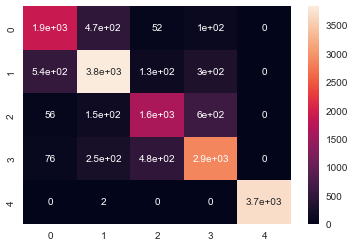

In [94]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

/Users/sudeshgurung/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


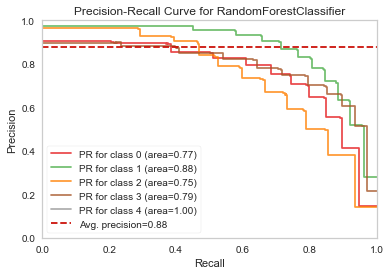

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [95]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=10, criterion= 'gini'),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [96]:
#visualise the tree
from sklearn import tree

#selecting a tree 
tree_3 = rf.estimators_[2]

plt.figure(figsize=(20,20))
features = scaled_x_df.columns
classes = uniq_lbls
tree.plot_tree(tree_3,feature_names=features,class_names=classes,filled=True)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f907fd5eaf0> (for post_execute):


KeyboardInterrupt: 

## 3. Neural network

In [97]:
#MLP is very sensitive to wide data ranges, so scaling the data is recommended
#scaling the data to [0,1]


In [98]:
# initialize the classifier
#MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp = MLPClassifier(random_state = 1, max_iter=500)

In [99]:
#fit the classifier to the data
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=1)

In [100]:
#use the resulting model to predict value on the test sey
y_pred = mlp.predict(X_test)

In [101]:
print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("AUC:", roc_auc_score(y_test, y_pred))
cm, uniq_lbls = create_cm(y_test, y_pred)
pd.DataFrame(cm, index = uniq_lbls, columns=uniq_lbls)

[[1827  534   61   98    0]
 [ 484 3900  156  255    0]
 [  56  164 1642  549    0]
 [  83  320  547 2723    0]
 [   0    0    0    0 3694]] 

Mean Absolute Error: 0.255133680453987
Mean Squared Error: 0.3996372784180659
Root Mean Squared Error: 0.6321687104073294 

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      2520
           1       0.79      0.81      0.80      4795
           2       0.68      0.68      0.68      2411
           3       0.75      0.74      0.75      3673
           4       1.00      1.00      1.00      3694

    accuracy                           0.81     17093
   macro avg       0.79      0.79      0.79     17093
weighted avg       0.81      0.81      0.81     17093

Accuracy: 0.8065289884748142


,AB,C1,C2,DE,No code required
AB,1827,534,61,98,0
C1,484,3900,156,255,0
C2,56,164,1642,549,0
DE,83,320,547,2723,0
No code required,0,0,0,0,3694


#### Cross validation

In [102]:
#cross-validation

mlp1 =  MLPClassifier(random_state=3, max_iter=500)

#accuracy scores for each fold
scores = cross_val_score(mlp1, scaled_x_df, enc_y, cv=10)
print(scores)

#print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.81291681 0.81625132 0.80852931 0.80888031 0.80726698 0.80867123
 0.8186765  0.81902756 0.81727225 0.80867123]
Accuracy: 0.81 (+/- 0.01)


In [103]:
#performance metrics


#predicted values
y_pred = cross_val_predict(mlp1, scaled_x_df, enc_y, cv=10)



In [105]:
print(confusion_matrix(enc_y, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(enc_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(enc_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(enc_y, y_pred)), '\n')

print(classification_report(enc_y, y_pred))
print("Accuracy:", accuracy_score(enc_y, y_pred))
#print("AUC:", roc_auc_score(enc_y, y_pred))

[[ 6123  1687   189   350     0]
 [ 1643 12782   516  1025     0]
 [  182   464  5541  1807     0]
 [  292   788  1733  9549     0]
 [    0     0     0     0 12303]] 

Mean Absolute Error: 0.2482535893565486
Mean Squared Error: 0.39252992593112646
Root Mean Squared Error: 0.6265220873449925 

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      8349
           1       0.81      0.80      0.81     15966
           2       0.69      0.69      0.69      7994
           3       0.75      0.77      0.76     12362
           4       1.00      1.00      1.00     12303

    accuracy                           0.81     56974
   macro avg       0.80      0.80      0.80     56974
weighted avg       0.81      0.81      0.81     56974

Accuracy: 0.8126162811106821


## 4. Logistic Regression

In [106]:
lr = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr', max_iter = 400)


In [107]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400, multi_class='ovr', random_state=1)

In [108]:
y_pred = lr.predict(X_test)

In [109]:
#performance metrics

#print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

#print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("AUC:", roc_auc_score(y_test, y_pred))
cm, uniq_lbls = create_cm(y_test, y_pred)
print("\n\t\tConfusion Matrix")
display(pd.DataFrame(cm, index = uniq_lbls, columns=uniq_lbls))




true_grade = le.inverse_transform(y_test)
predicted_grade = le.inverse_transform(y_pred)


report = classification_report(true_grade, predicted_grade, output_dict = True)
report_df_LR = pd.DataFrame(report).transpose()
print("\n\t\tAccuracy Statistics")
report_df_LR



Mean Absolute Error: 0.24349148774352075
Mean Squared Error: 0.36225355408646814
Root Mean Squared Error: 0.6018750319513746 

Accuracy: 0.8070555198034283

		Confusion Matrix


,AB,C1,C2,DE,No code required
AB,1885,488,44,103,0
C1,584,3700,156,355,0
C2,31,87,1494,799,0
DE,48,132,471,3022,0
No code required,0,0,0,0,3694



		Accuracy Statistics


,precision,recall,f1-score,support
AB,0.739796,0.748016,0.743883,2520.000000
C1,0.839573,0.771637,0.804173,4795.000000
C2,0.690069,0.619660,0.652972,2411.000000
DE,0.706240,0.822761,0.760060,3673.000000
No code required,1.000000,1.000000,1.000000,3694.000000
accuracy,0.807056,0.807056,0.807056,0.807056
macro avg,0.795136,0.792415,0.792218,17093.000000
weighted avg,0.809794,0.807056,0.806799,17093.000000


In [110]:
actual, predicted = show_true_values(y_test, y_pred)
prediction_df = pd.DataFrame(data=actual, columns=['Approximated social grade'] )
prediction_df['Predicted(Approximated social grade)'] = predicted

prediction_df[(prediction_df['Approximated social grade'] == 'AB') & (prediction_df['Predicted(Approximated social grade)'] == 'AB')].count()

Approximated social grade               1885
Predicted(Approximated social grade)    1885
dtype: int64

<AxesSubplot:title={'center':'Logistic Regression Algorithm'}, ylabel='recall'>

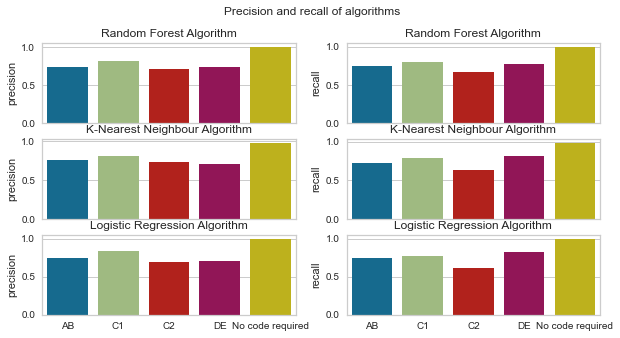

In [111]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(10,5))

fig.suptitle('Precision and recall of algorithms')
axes[0][0].set_title('Random Forest Algorithm')
axes[0][1].set_title('Random Forest Algorithm')

axes[1][0].set_title('K-Nearest Neighbour Algorithm')
axes[1][1].set_title('K-Nearest Neighbour Algorithm')

axes[2][0].set_title('Logistic Regression Algorithm')
axes[2][1].set_title('Logistic Regression Algorithm')

# Precision
sns.barplot(ax=axes[0][0], x=report_df_rf.index[:5], y=report_df_rf.precision[:5])
sns.barplot(ax=axes[0][1], x=report_df_rf.index[:5], y=report_df_rf.recall[:5])

sns.barplot(ax=axes[1][0], x=report_df_knn.index[:5], y=report_df_knn.precision[:5])
sns.barplot(ax=axes[1][1], x=report_df_knn.index[:5], y=report_df_knn.recall[:5])

sns.barplot(ax=axes[2][0], x=report_df_LR.index[:5], y=report_df_LR.precision[:5])
sns.barplot(ax=axes[2][1], x=report_df_LR.index[:5], y=report_df_LR.recall[:5])


## Cross validation Logistic Regression

In [112]:

lr = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr', max_iter = 500)

#accuracy scores for each fold
scores = cross_val_score(lr, scaled_x_df, enc_y, cv=10)
print(scores)

#print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.80572131 0.81361881 0.80800281 0.8046683  0.80937335 0.80796911
 0.80674039 0.81481481 0.80884676 0.79743725]
Accuracy: 0.81 (+/- 0.01)


In [113]:
#performance metrics

#predicted values
y_pred = cross_val_predict(lr, scaled_x_df, enc_y, cv=10)

print(confusion_matrix(enc_y, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(enc_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(enc_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(enc_y, y_pred)), '\n')

print(classification_report(enc_y, y_pred))
print("Accuracy:", accuracy_score(enc_y, y_pred))
#print("AUC:", roc_auc_score(y, y_pred))
cm, uniq_lbls = create_cm(enc_y, y_pred)
pd.DataFrame(cm, index = uniq_lbls, columns=uniq_lbls)

[[ 6204  1622   141   382     0]
 [ 1926 12259   549  1232     0]
 [  115   324  5015  2540     0]
 [  158   406  1560 10238     0]
 [    0     0     0     0 12303]] 

Mean Absolute Error: 0.24447993821743252
Mean Squared Error: 0.36783445080212024
Root Mean Squared Error: 0.606493570289183 

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      8349
           1       0.84      0.77      0.80     15966
           2       0.69      0.63      0.66      7994
           3       0.71      0.83      0.77     12362
           4       1.00      1.00      1.00     12303

    accuracy                           0.81     56974
   macro avg       0.80      0.79      0.79     56974
weighted avg       0.81      0.81      0.81     56974

Accuracy: 0.8077193105627128


,AB,C1,C2,DE,No code required
AB,6204,1622,141,382,0
C1,1926,12259,549,1232,0
C2,115,324,5015,2540,0
DE,158,406,1560,10238,0
No code required,0,0,0,0,12303
